In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [299]:
data = pd.read_csv('train.csv')
data2 = pd.read_csv('test.csv')

In [300]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [301]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [302]:
data2.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [303]:
data['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

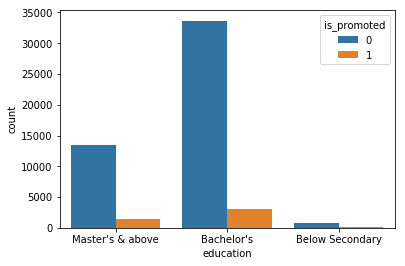

In [304]:
sns.countplot('education',data=data,hue='is_promoted')

Since. most number of category in 'education' is- Bachelor's education, thus we replace the Null values by MODE.

In [305]:
data['education'].fillna('Bachelor\'s',inplace=True)
data2['education'].fillna('Bachelor\'s',inplace=True)

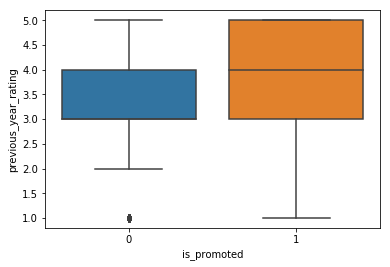

In [306]:
sns.boxplot('is_promoted','previous_year_rating',data=data)

Boxplot shows that, we can replace the Null values of 'previous_year_rating' by 4

In [307]:
data['previous_year_rating'].fillna(4,inplace=True)
data2['previous_year_rating'].fillna(4,inplace=True)

In [308]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

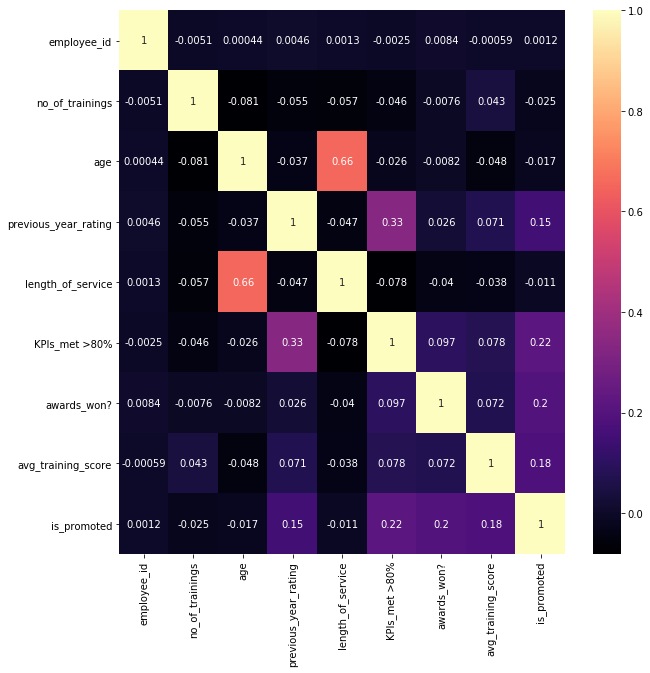

In [309]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='magma')

Employee ID has no significance!

In [310]:
del data['employee_id']
del data2['employee_id']

In [311]:
data.shape

(54808, 13)

In [312]:
df=pd.get_dummies(data['gender'],drop_first=True)
data=pd.concat([df,data],axis=1)
del data['gender']
df2=pd.get_dummies(data2['gender'],drop_first=True)
data2=pd.concat([df2,data2],axis=1)
del data2['gender']

In [313]:
df=pd.get_dummies(data['recruitment_channel'],drop_first=True)
df2=pd.get_dummies(data2['recruitment_channel'],drop_first=True)

In [314]:
data=pd.concat([df,data],axis=1)
data2=pd.concat([df2,data2],axis=1)

In [315]:
del data['recruitment_channel']
del data2['recruitment_channel']

In [316]:
df=pd.get_dummies(data['education'],drop_first=True)
data=pd.concat([df,data],axis=1)
del data['education']
df2=pd.get_dummies(data2['education'],drop_first=True)
data2=pd.concat([df2,data2],axis=1)
del data2['education']

In [317]:
data['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

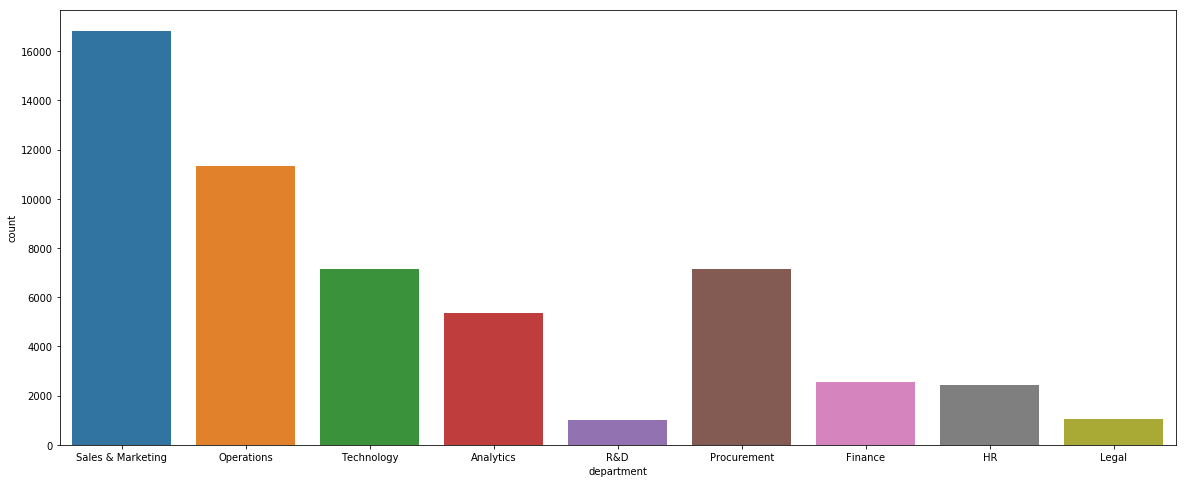

In [318]:
plt.figure(figsize=(20,8))
sns.countplot('department',data=data)

In [319]:
data['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [320]:
s=0
o=0
t=0
a=0
r=0
l=0
h=0
f=0
p=0
for i in range(54808):
    if data['department'][i]=='Sales & Marketing' and data['is_promoted'][i]==1:
        s+=1
    elif data['department'][i]=='Operations' and data['is_promoted'][i]==1:
        o+=1
    if data['department'][i]=='Technology' and data['is_promoted'][i]==1:
        t+=1
    if data['department'][i]=='Analytics' and data['is_promoted'][i]==1:
        a+=1
    if data['department'][i]=='R&D' and data['is_promoted'][i]==1:
        r+=1
    if data['department'][i]=='Legal' and data['is_promoted'][i]==1:
        l+=1
    if data['department'][i]=='HR' and data['is_promoted'][i]==1:
        h+=1
    if data['department'][i]=='Finance' and data['is_promoted'][i]==1:
        f+=1
    if data['department'][i]=='Procurement' and data['is_promoted'][i]==1:
        p+=1
lis=[s,o,t,a,r,l,h,f,p]
lis2=[]
for i in range(len(lis)):
    lis2.append(lis[i]/54808)

In [321]:
lis3=[]
for i in range(54808):
    if data['department'][i]=='Sales & Marketing':
        lis3.append(lis2[0])
    if data['department'][i]=='Operations':
        lis3.append(lis2[1])
    if data['department'][i]=='Technology':
        lis3.append(lis2[2])
    if data['department'][i]=='Analytics':
        lis3.append(lis2[3])
    if data['department'][i]=='R&D':
        lis3.append(lis2[4])
    if data['department'][i]=='Legal':
        lis3.append(lis2[5])
    if data['department'][i]=='HR':
        lis3.append(lis2[6])
    if data['department'][i]=='Finance':
        lis3.append(lis2[7])
    if data['department'][i]=='Procurement':
        lis3.append(lis2[7])

In [322]:
data['department2']=lis3
data['department']=data['department2']
del data['department2']

In [323]:
lis3=[]
for i in range(23490):
    if data2['department'][i]=='Sales & Marketing':
        lis3.append(lis2[0])
    if data2['department'][i]=='Operations':
        lis3.append(lis2[1])
    if data2['department'][i]=='Technology':
        lis3.append(lis2[2])
    if data2['department'][i]=='Analytics':
        lis3.append(lis2[3])
    if data2['department'][i]=='R&D':
        lis3.append(lis2[4])
    if data2['department'][i]=='Legal':
        lis3.append(lis2[5])
    if data2['department'][i]=='HR':
        lis3.append(lis2[6])
    if data2['department'][i]=='Finance':
        lis3.append(lis2[7])
    if data2['department'][i]=='Procurement':
        lis3.append(lis2[7])

In [324]:
len(lis3)

23490

In [325]:
data2['department2']=lis3
data2['department']=data2['department2']
del data2['department2']

In [326]:
region_2=0
region_22=0
region_7=0
region_15=0
region_13=0
region_26=0
region_31=0
region_4=0
region_27=0
region_16=0
region_28=0
region_11=0
region_23=0
others=0
lis=[region_2,region_22,region_7,region_15,region_13,region_26,region_31,region_4,region_27,region_16,region_28,region_11,region_23,others]
for i in range(54808):
    if data['region'][i]=='region_2' and data['is_promoted'][i]==1:
        region_2+=1
    elif data['region'][i]=='region_22' and data['is_promoted'][i]==1:
        region_22+=1
    if data['region'][i]=='region_7' and data['is_promoted'][i]==1:
        region_7+=1
    if data['region'][i]=='region_15' and data['is_promoted'][i]==1:
        region_15+=1
    if data['region'][i]=='region_13' and data['is_promoted'][i]==1:
        region_13+=1
    if data['region'][i]=='region_26' and data['is_promoted'][i]==1:
        region_26+=1
    if data['region'][i]=='region_31' and data['is_promoted'][i]==1:
        region_31+=1
    if data['region'][i]=='region_4' and data['is_promoted'][i]==1:
        region_4+=1
    if data['region'][i]=='region_27' and data['is_promoted'][i]==1:
        region_27+=1
    if data['region'][i]=='region_16' and data['is_promoted'][i]==1:
        region_16+=1
    if data['region'][i]=='region_28' and data['is_promoted'][i]==1:
        region_28+=1
    if data['region'][i]=='region_11' and data['is_promoted'][i]==1:
        region_11+=1
    if data['region'][i]=='region_23' and data['is_promoted'][i]==1:
        region_23+=1
    elif data['region'][i] not in lis and data['is_promoted'][i]==1:
        others+=1
lis=[region_2,region_22,region_7,region_15,region_13,region_26,region_31,region_4,region_27,region_16,region_28,region_11,region_23,others]
lis2=[]
for i in range(len(lis)):
    lis2.append(lis[i]/54808)
print(lis2)

[0.018044810976499782, 0.01339220551744271, 0.009414683987739016, 0.004050503576120274, 0.0041964676689534375, 0.0026091081593927895, 0.0020070062764559918, 0.004488395854619764, 0.0023901620201430447, 0.0018610421836228288, 0.0028098087870383885, 0.001350167858706758, 0.002499635089767917, 0.08267041307838272]


In [327]:
lis3=[]

In [328]:
lis4=['region_2','region_22','region_7','region_15','region_13','region_26','region_31','region_4','region_27','region_16','region_28','region_11','region_23']
lis3=[]
for i in range(54808):
    if data['region'][i]=='region_2':
        lis3.append(lis2[0])
    elif data['region'][i]=='region_22':
        lis3.append(lis2[1])
    if data['region'][i]=='region_7':
        lis3.append(lis2[2])
    if data['region'][i]=='region_15':
        lis3.append(lis2[3])
    if data['region'][i]=='region_13':
        lis3.append(lis2[4])
    if data['region'][i]=='region_26':
        lis3.append(lis2[5])
    if data['region'][i]=='region_31':
        lis3.append(lis2[6])
    if data['region'][i]=='region_4':
        lis3.append(lis2[7])
    if data['region'][i]=='region_27':
        lis3.append(lis2[8])
    if data['region'][i]=='region_16':
        lis3.append(lis2[9])
    if data['region'][i]=='region_28':
        lis3.append(lis2[10])
    if data['region'][i]=='region_11':
        lis3.append(lis2[11])
    if data['region'][i]=='region_23':
        lis3.append(lis2[12])
    if data['region'][i] not in lis4:
        lis3.append(lis2[13])

In [329]:
len(lis3)

54808

In [330]:
data['region2']=lis3
data['region']=data['region2']
del data['region2']

In [331]:
lis3=[]

In [332]:
lis4=['region_2','region_22','region_7','region_15','region_13','region_26','region_31','region_4','region_27','region_16','region_28','region_11','region_23']
lis3=[]
for i in range(23490):
    if data2['region'][i]=='region_2':
        lis3.append(lis2[0])
    elif data2['region'][i]=='region_22':
        lis3.append(lis2[1])
    if data2['region'][i]=='region_7':
        lis3.append(lis2[2])
    if data2['region'][i]=='region_15':
        lis3.append(lis2[3])
    if data2['region'][i]=='region_13':
        lis3.append(lis2[4])
    if data2['region'][i]=='region_26':
        lis3.append(lis2[5])
    if data2['region'][i]=='region_31':
        lis3.append(lis2[6])
    if data2['region'][i]=='region_4':
        lis3.append(lis2[7])
    if data2['region'][i]=='region_27':
        lis3.append(lis2[8])
    if data2['region'][i]=='region_16':
        lis3.append(lis2[9])
    if data2['region'][i]=='region_28':
        lis3.append(lis2[10])
    if data2['region'][i]=='region_11':
        lis3.append(lis2[11])
    if data2['region'][i]=='region_23':
        lis3.append(lis2[12])
    if data2['region'][i] not in lis4:
        lis3.append(lis2[13])

In [333]:
len(lis3)

23490

In [334]:
data2['region2']=lis3
data2['region']=data2['region2']
del data2['region2']

In [335]:
data.head()

,Below Secondary,Master's & above,referred,sourcing,m,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,1,0,1,0,0.022132,0.009415,1,35,5.0,8,1,0,49,0
1,0,0,0,0,1,0.018665,0.013392,1,30,5.0,4,0,0,60,0
2,0,0,0,1,1,0.022132,0.082670,1,34,3.0,7,0,0,50,0
3,0,0,0,0,1,0.022132,0.002500,2,39,1.0,10,0,0,50,0
4,0,0,0,0,1,0.014013,0.002609,1,45,3.0,2,0,0,73,0


In [336]:
data2.head()

,Below Secondary,Master's & above,referred,sourcing,m,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,0,0,0,1,1,0.014013,0.002609,1,24,4.0,1,1,0,77
1,0,0,0,0,0,0.002481,0.004488,1,31,3.0,5,0,0,51
2,0,0,0,0,1,0.022132,0.004196,1,31,1.0,4,0,0,47
3,0,0,0,0,0,0.003759,0.018045,3,31,2.0,9,0,0,65
4,0,0,0,1,1,0.003759,0.082670,1,30,4.0,7,0,0,61


**No.of Trainings**

In [337]:
X_train= data.iloc[:,:-1].values
y_train= data.iloc[:,-1].values
X_test=data2.iloc[:,:].values

In [338]:
data2=pd.read_csv('test.csv')

**XGBOOST**

In [395]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
xgb_model = XGBClassifier(base_score=0.1, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=1200,
       n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
 
# Training the models
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)

KeyboardInterrupt: 

In [ ]:
col={'employee_id':data2['employee_id'],'is_promoted':y_pred}
submission = pd.DataFrame(col,columns=['employee_id','is_promoted'])

In [ ]:
filename = 'HR_prediction.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)